#### Import the necessary libraries

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Libraries for reading data
import pandas as pd
import numpy as np

# Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
df = pd.read_excel("./Credit+Card+Customer+Data.xlsx")

In [4]:
# Explore the first 5 lines

df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
# Explore the last 5 lines

df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [22]:
df.sample(50)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
368,369,82376,20000,4,3,0,3
299,300,67911,9000,6,5,2,3
327,328,26767,11000,5,5,1,1
57,58,17937,6000,2,0,2,10
111,112,83244,12000,2,0,4,9
400,401,31551,75000,7,3,2,4
414,415,53932,65000,4,3,0,3
87,88,37559,5000,4,1,2,5
492,493,49690,50000,6,4,2,0
3,4,40496,30000,5,1,1,4


In [6]:
# Check for empty rows

df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# Check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [13]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


#### Create a copy of the dataframe

In [15]:
df2 = df.copy()

#### The S/N and Customer Key Column has to be dropped, they won't contribute to the model

In [17]:
df2.drop("Sl_No", axis = 1, inplace=True)

In [18]:
df2.drop("Customer Key", axis = 1, inplace=True)

In [20]:
df2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [21]:
# Check the datatypes

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


#### Observations

- The maximum Total Credit Cards collected by any customer is 10
- The maximum number of physical visit to the bank in a year is 5
- The maximum number of online login is 15
- The difference between the mean and the median of the Average Credit limit is so wide
- There is definitely outlier in the data.

#### Check missing values again

In [24]:
df2.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- No missing values

#### Carrying out Exploratory Data Analysis

In [25]:
from functions import labeled_barplot

#### Univariate Analysis

In [26]:
# select the numerical features as a list of numerical columns
numerical_column = df2.select_dtypes(include= np.number).columns.tolist()

numerical_column

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

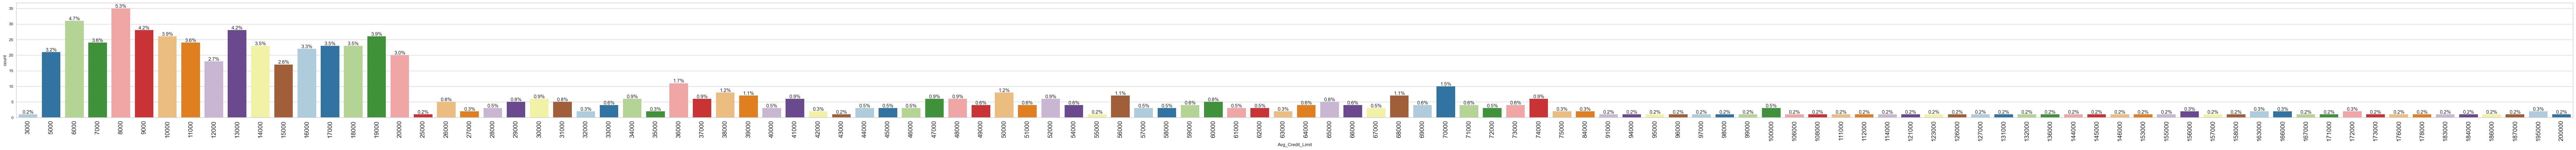

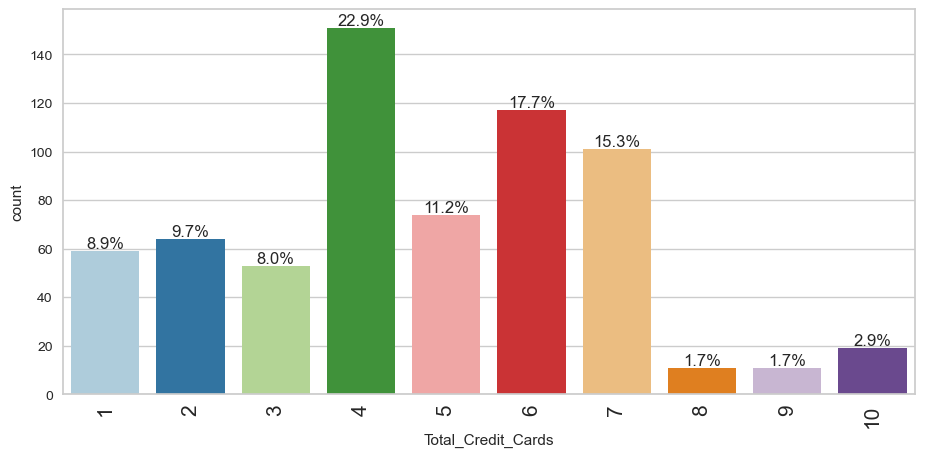

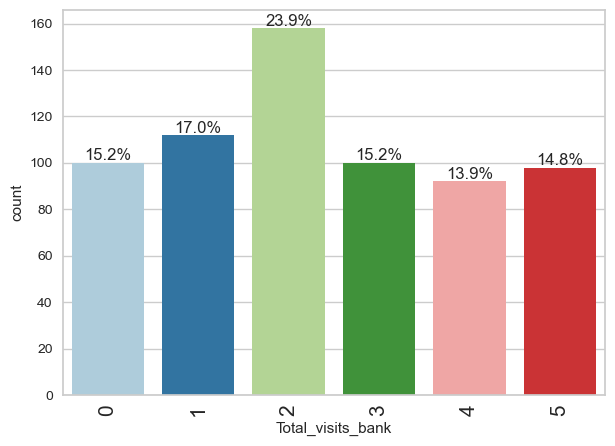

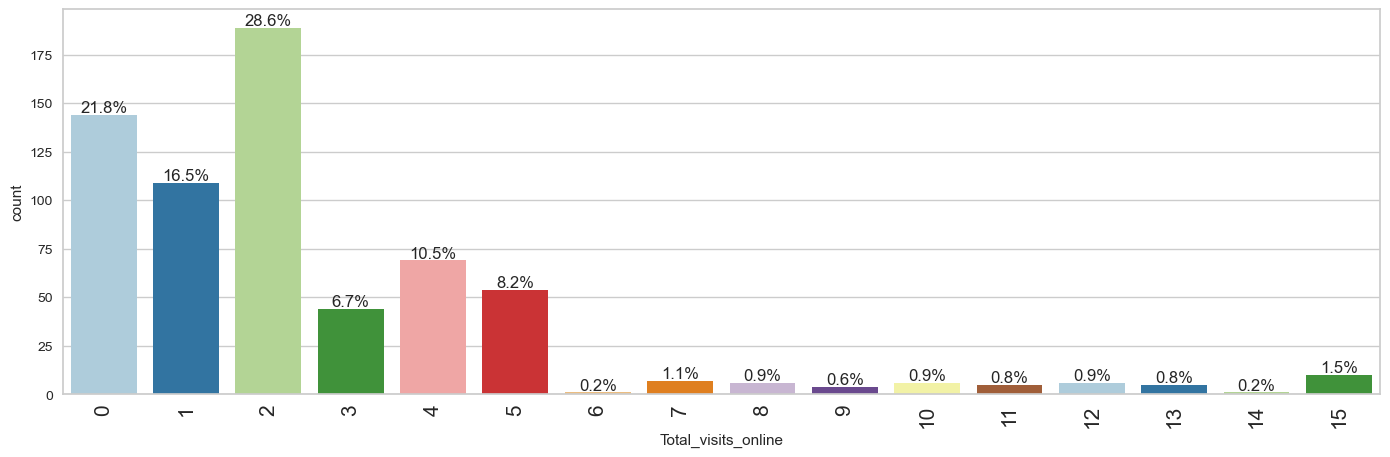

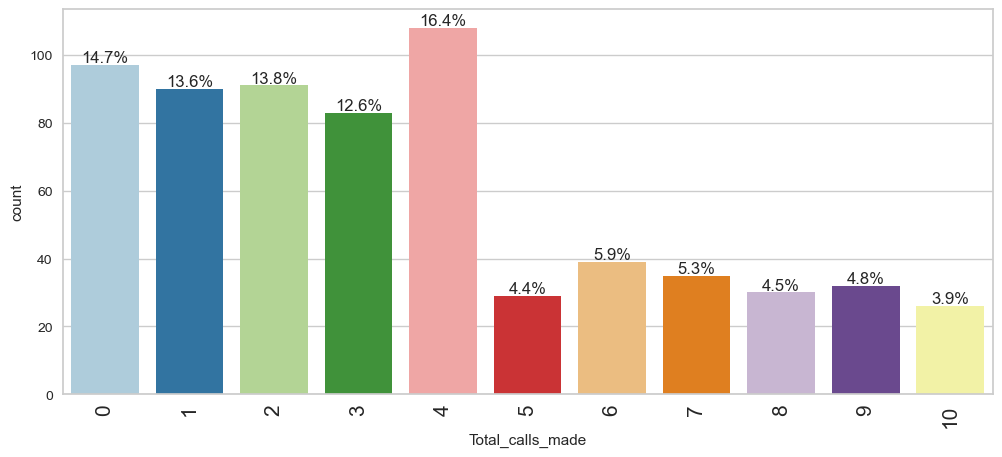

In [27]:
# loop through each column and create a bar plot for each feature

for col in numerical_column:
    labeled_barplot(data = df2, feature=col, perc=True)

#### Observations

- Customers with 4 credit cards are more with 22.9%
- Customers who visited the bank 2 times are 23.9%
- Customers who logged in 2 times in a year were 28.6%
- Customers who made 4 calls to the bank were 16.4%

#### Bivariate Analysis

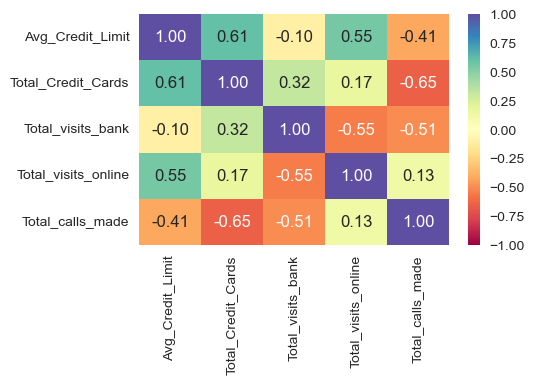

In [28]:
# Show the correlation

numerical_data = df2[numerical_column]

cor = numerical_data.corr()

plt.figure(figsize=(5, 3))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = "Spectral", annot=True, fmt=".2f")
plt.show()

#### Observations

- Average credit limit is well correlated with Total Credit cards
- The more the cards, the higher the credit limit will be.

#### Scaling is required because k-means compute distance metrics

In [29]:
scaler = StandardScaler()
numerical_data_sd = scaler.fit_transform(numerical_data)

In [38]:
numerical_data_sd

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

#### K-Means Clustering

In [44]:
numerical_data_sd

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [56]:
kmeans = KMeans(random_state=0)

kmeans.fit(numerical_data_sd)

KMeans(random_state=0)

In [57]:
y_pred = kmeans.predict(numerical_data_sd)

AttributeError: 'NoneType' object has no attribute 'split'

In [53]:
kmeans.inertia_

563.5023751996688

In [55]:
y_pred = kmeans.predict(numerical_data_sd)

AttributeError: 'NoneType' object has no attribute 'split'

In [40]:
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(numerical_data_sd)  # Fit kMeans on the data
    prediction = model.predict(numerical_data_sd)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(numerical_data_sd, model.cluster_centers_, "euclidean"), axis=1))
        / num_data.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

AttributeError: 'NoneType' object has no attribute 'split'

#### Applying DB Scan

In [59]:
sns.set_theme()

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans, DBSCAN

In [60]:
# Create an instance of the DBScan

dbscan = DBSCAN()

In [61]:
# Fit and predict the labels

db_labels = dbscan.fit_predict(numerical_data_sd)

In [62]:
# Check the labels

np.unique(db_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

#### Choosing optimal values of eps and minPts

In [63]:
# import itertools

import itertools

In [64]:
# Trying values of eps between 0.1 and 1; minPts between 2 and 10

eps = np.linspace(0.1, 1, 10)
minPts = np.arange(2, 10)

In [66]:
# Create a tuple of eps and minPts using product method of itertools

hyperparameter_list = list(itertools.product(eps, minPts))

for (eps, minPts) in hyperparameter_list:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(numerical_data_sd)
    score = silhouette_score(numerical_data_sd, labels)
    print(f"eps: {eps}; minPts: {minPts}; num_labels: {len(np.unique(labels))}; score: {score}")

eps: 0.1; minPts: 2; num_labels: 59; score: -0.3792847005046285
eps: 0.1; minPts: 3; num_labels: 6; score: -0.4538623399170749
eps: 0.1; minPts: 4; num_labels: 3; score: -0.21755863126572988


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [67]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1